In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

## Project Description

During my recent [DND](https://en.wikipedia.org/wiki/Dungeons_%26_Dragons) campaign, my two players got involved in a fight for the ownership of magic items, with both of them claiming that they can make better use of those items than each other. Therefore, I made a combat simulator to testify whether their claims about their combat abilities are correct or not.

For this project, I will demonstrate how the code runs and make some simple data analysis as well visualizations using the simulated data from the code.

### Background Information

The reason why coding is needed to solve the combat problem for DND is that the game involves determing attack and damage taken by rolling dice, and python, typicall `numpy.random` module, provides a direct way to examine the results of such a random process. As compared to statistical calculations, simulated random processes are more tangible if the random variable is ever-changing.

The DND combat rules that will be applied to guide the python function of this porject is the following:<br>
* To make an attack, the player will roll an 20-sided dice and add and attack modifier to the result. The target of the attack has an Armor Class(ac). If the total of the attack roll plus the modifier equals or exceeds target's Armor Class(ac), the attack hits.


* If the attack hits, the player then will roll corresponding damage dice(s), the size of the dice(s) varies. The damage dealt is the sum of rolls plus the damage modifier.


* It is convential in DND to represent dice in the for of 'xdy', where x is the number of dice and y is the number of side, for instance '2d8' means two eight-sided dice. Only damage dice varies, while attack dice are always 'd20', a twenty-sided dice.


*Rules above have been in function documentations.

## Running the Code

In [3]:
import module as mod

The python module imported is used to simulate attacks and return damage dealt. If the attack is missed, 0 damage is dealt. The `sim_attack` function is used to simulate a single attack.

The function takes the following **parameters**:<br>

`ac`: Armor Class of the target

`attack_modifier`: the value to be added to the attack dice roll;
it can be negative or 0.
    
`dmg_dice`: a list of string representing dice to roll to determine damage,
dice are represented in 'xdy' way in which x is the number of dice and y
is the number of side, for instance '2d8' means two eight-sided dice.<br>
    
`dmg_modifier`: the value to be added to the damage dice roll;
it can be negative or 0.
    
`advantage`: an attack with advantage can roll 2 instead of 1 attack dice,
and choose the highest as the result. Default False

In [4]:
# The followling line demonstrate an attack with +10 modifier 
# on a target with 23 armor class. 
# To do this, the attack will roll a twenty-sided dice and add 10 to the result,
# and if the sum is greater or equal to 23, the attack hits.
# When attack is hit, 1d8+9 damage will be dealt.
# To determine an 1d8+9 damage, roll a eight-sided dice and add 9 to the result.
mod.sim_attack(23,10,['1d8'],9)

14

DND combat takes place in turns. A player can often make multiple attacks in one turn. The following code demonstrates the result(in list) of 3 attacks. The function takes all parameters of `sim_attack` function with an additional parameter `N` to determine the number of attacks to be generated

In [5]:
mod.sim_N(23,10,['1d8'],9,3)

[0, 10, 10]

The `sim_N` function can also be used to generate a considerably large sample of attack result, which is typically useful for data analysis. The following cell produce a form of damage output by attacking 10000 times on targets with armor class from 5 to 10.

In [6]:
result = pd.Series([mod.sim_N(i,10,['1d8'],9,10000) for i in range(5,10)],index=range(5,10))
result

5    [13, 16, 13, 16, 14, 14, 17, 15, 14, 13, 12, 1...
6    [17, 11, 15, 14, 16, 16, 12, 10, 12, 11, 15, 1...
7    [14, 14, 14, 12, 14, 11, 17, 12, 14, 13, 12, 1...
8    [10, 15, 10, 17, 12, 12, 15, 15, 10, 12, 17, 1...
9    [12, 10, 14, 14, 10, 16, 16, 10, 11, 17, 10, 1...
dtype: object

### Solving Issues

#### Senario 1

During the adventure we found a Flaming Sword that provides additional '2d6' damage dice. Our fighter claims that this sword would significantly increases his damage output during the combat, but the paladin points out that the fighter has already got a magic sword which provides +2 to both the attack modifier and damage modifier.

In [7]:
flame = pd.Series([mod.sim_N(i,8,['1d8','2d6'],7,10000) for i in range(13,28)],index=range(13,28))
flame

13    [0, 0, 13, 19, 15, 25, 16, 14, 0, 17, 0, 18, 1...
14    [0, 14, 0, 15, 11, 20, 16, 17, 11, 23, 0, 23, ...
15    [0, 16, 17, 14, 0, 22, 21, 0, 20, 0, 23, 21, 2...
16    [19, 0, 0, 0, 0, 14, 22, 18, 14, 16, 0, 21, 19...
17    [0, 22, 0, 0, 0, 19, 0, 0, 21, 25, 17, 12, 0, ...
18    [0, 0, 15, 23, 21, 15, 0, 0, 16, 0, 18, 24, 19...
19    [19, 0, 0, 11, 0, 0, 18, 26, 0, 0, 0, 21, 0, 1...
20    [18, 16, 18, 17, 0, 0, 0, 18, 0, 18, 17, 0, 19...
21    [21, 0, 11, 22, 0, 19, 14, 0, 0, 0, 0, 0, 0, 0...
22    [15, 16, 13, 0, 0, 0, 0, 27, 0, 15, 0, 21, 0, ...
23    [0, 0, 0, 25, 0, 0, 26, 18, 0, 25, 0, 18, 0, 0...
24    [0, 10, 0, 13, 0, 0, 19, 0, 0, 16, 0, 0, 0, 0,...
25    [0, 0, 0, 20, 0, 0, 16, 0, 0, 0, 21, 0, 0, 12,...
26    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
27    [0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0,...
dtype: object

In [8]:
null = pd.Series([mod.sim_N(i,8+2,['1d8'],7+2,10000) for i in range(13,28)],index=range(13,28))
null

13    [15, 10, 14, 14, 14, 15, 11, 11, 11, 14, 11, 1...
14    [17, 13, 17, 14, 17, 17, 11, 17, 11, 13, 10, 1...
15    [14, 15, 11, 0, 14, 0, 10, 10, 15, 0, 14, 13, ...
16    [11, 16, 13, 0, 13, 13, 15, 0, 0, 0, 0, 16, 14...
17    [13, 0, 14, 13, 15, 17, 0, 10, 16, 0, 14, 13, ...
18    [13, 0, 14, 16, 13, 0, 0, 0, 11, 0, 17, 16, 16...
19    [15, 0, 13, 0, 11, 0, 12, 16, 0, 0, 13, 0, 16,...
20    [0, 13, 0, 17, 0, 17, 11, 15, 0, 15, 11, 16, 1...
21    [0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 16, 0, 17, 0, ...
22    [0, 0, 10, 14, 0, 13, 0, 0, 0, 0, 0, 14, 0, 0,...
23    [15, 0, 0, 12, 17, 0, 0, 0, 0, 16, 0, 0, 12, 1...
24    [10, 0, 0, 0, 0, 0, 17, 0, 12, 0, 0, 0, 0, 0, ...
25    [11, 0, 10, 0, 0, 12, 16, 10, 14, 0, 0, 0, 0, ...
26    [16, 0, 0, 0, 17, 17, 0, 0, 0, 0, 0, 0, 0, 14,...
27    [15, 13, 0, 0, 14, 0, 0, 13, 0, 0, 0, 0, 0, 0,...
dtype: object

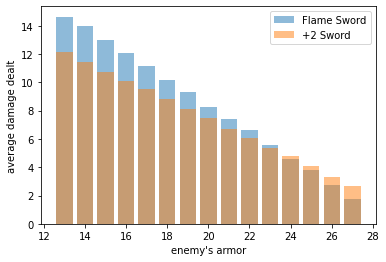

In [9]:
plt.bar(flame.index,height=flame.apply(np.average),alpha=0.5)
plt.bar(null.index,height=null.apply(np.average),alpha=0.5)
plt.xlabel("enemy's armor")
plt.ylabel('average damage dealt')
plt.legend(['Flame Sword','+2 Sword'])

Text(0.5, 1.0, 'Difference in Damge after Changing to Flame Sword')

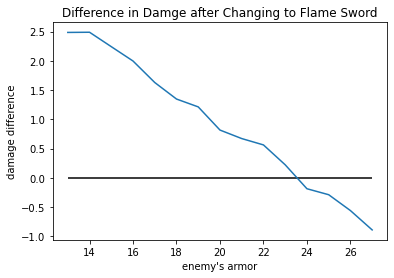

In [10]:
plt.plot(flame.apply(np.average)-null.apply(np.average))
plt.hlines(0,13,27)
plt.xlabel("enemy's armor")
plt.ylabel('damage difference')
plt.title('Difference in Damge after Changing to Flame Sword')

Using the result of simulating 10000 attacks, it may be concluded that the flame sword performs better on enemies under 24 armor class. The question of which sword is better is rather situational.

#### Senario 2

Besides the sword, our fighter and paladin also disagree on the ownership of a '+2 Plate', which provides 2 additional armor class to the equiper. The paladin wants it because he is the one who always stands in the front line. The fighter rebukes by claiming that most enemies are not able to pierece paladin's armor anyway, and therefore the marginal utility of  armor classes are trivial--it is better to give such an armor to team members who have lesser armor class. The paladin, however, insists that additional armors improves the same regardless.

In [11]:
arr = []
for i in range(1,30):
    # simulate attacks from enemies with +8 attack modifer and deal 3d8+5 damage
    arr.append(np.average(mod.sim_N(i,8,['3d8'],5,5000))) 

Text(0, 0.5, 'Damage Received Each Turn')

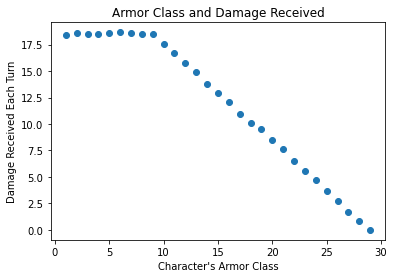

In [12]:
plt.scatter(x=list(range(1,30)),y=arr)
plt.title('Armor Class and Damage Received')
plt.xlabel("Character's Armor Class")
plt.ylabel('Damage Received Each Turn')

In [13]:
np.diff(arr)

array([ 0.1464, -0.1092,  0.0012,  0.1446,  0.0522, -0.105 , -0.021 ,
       -0.0714, -0.9328, -0.8698, -0.8586, -0.8994, -1.0888, -0.9316,
       -0.8394, -1.075 , -0.9122, -0.5258, -1.0094, -0.8844, -1.125 ,
       -0.9766, -0.8424, -0.974 , -0.978 , -1.0452, -0.8206, -0.8744])

Text(0.5, 0, 'Armor Class')

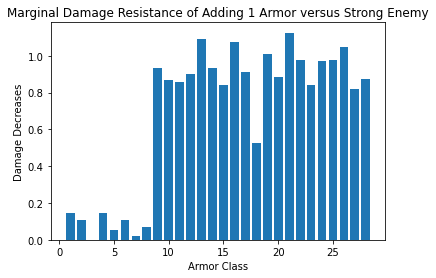

In [14]:
plt.bar(x=list(range(1,29)),height = abs(np.diff(arr)))
plt.title('Marginal Damage Resistance of Adding 1 Armor versus Strong Enemy')
plt.ylabel('Damage Decreases')
plt.xlabel('Armor Class')

Text(0.5, 0, 'Armor Class')

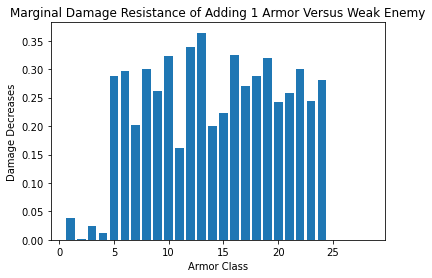

In [15]:
arr = []
for i in range(1,30):
    # simulate attacks from a weaker enemy with +4 attack modifer and deal 1d8+2 damage
    arr.append(np.average(mod.sim_N(i,4,['1d6'],2,5000)))
plt.bar(x=list(range(1,29)),height = abs(np.diff(arr)))
plt.title('Marginal Damage Resistance of Adding 1 Armor Versus Weak Enemy')
plt.ylabel('Damage Decreases')
plt.xlabel('Armor Class')

In [16]:
1.4/0.35

4.0

In conclusion, given that paladin's armor class is currently 23, the marginal utility of extra armors is not decreasing when facing a variety of enemies. However, the graph also points out that upon weaker enemies, additional armor class provides no more than 0.35 damage duduction each turn, which is relatively trivial.<br>
Moreover, the data analysis quantitatively reveals the power of hordes of weak enemies. By looking at the scale of damage outputs,4 weak enemies(like bugbear) can pose equivalent threat as a typically strong enemy(like giant).

## Simulating Combat

#### Abilities
Paladin can take the Oath of Vengeance to attack with advantage.<br>
Fighter can deal extra 1d8 damage.



In [68]:
paladin={'hp':61,'ac':23,'attack_modifier':8,'damage_modifier':5,'damage_dice':['1d8']}
fighter={'hp':48,'ac':20,'attack_modifier':10,'damage_modifier':8,'damage_dice':['2d8']}

def duel(paladin,fighter,show_progress=True):
    """
    This function simulates a duel between the paladin and the fighter, as both of them think they are the 
    strongest in the team while refusing to concede defeats in actual table game play 
    for they think it's purely 'bad luck' to lose.
    
    Parameters:
    --------
    paladin: a dictionary of statistics of paladin
    fighter: a dictionary of statistics of fighter
    show_progress: a boolean variable indicating whether to show detailed combat info in each turn,
    this can be nasty when running many duels. Default True.
    
    Output:
    ------
    A string showing the result of combat
    """
    turn=0
    paladin_hp = paladin['hp']
    fighter_hp = fighter['hp']
    while(paladin_hp>0 and fighter_hp>0):
        turn+=1
        
        paladin_hp-=mod.sim_attack(
            paladin['ac'],fighter['attack_modifier'],fighter['damage_dice'],fighter['damage_modifier'])
        
        fighter_hp-=mod.sim_attack(
            fighter['ac'],paladin['attack_modifier'],paladin['damage_dice'],paladin['damage_modifier'],advantage=True)
        if show_progress:
            print('Turn: ',turn)
            print('paladin: ',paladin_hp)
            print('fighter: ',fighter_hp)
            print('---')
        
    if paladin_hp<=0 and fighter_hp<=0:
        return 'Tie'
    close=''
    if abs(paladin_hp-fighter_hp)<=10:
        close='Close One! '
    if paladin_hp>0 and fighter_hp<=0:
        return close+'Paladin Wins'
    if paladin_hp<=0 and fighter_hp>0:
        return close+'Fighter Wins'
        
duel(paladin,fighter)

Turn:  1
paladin:  61
fighter:  48
---
Turn:  2
paladin:  61
fighter:  48
---
Turn:  3
paladin:  39
fighter:  42
---
Turn:  4
paladin:  39
fighter:  42
---
Turn:  5
paladin:  17
fighter:  42
---
Turn:  6
paladin:  1
fighter:  32
---
Turn:  7
paladin:  -11
fighter:  20
---


'Fighter Wins'

Now we can run a test for 100 games to determine which of the two have a better chance of winning the duel.

In [70]:
res = []
for _ in range(100):
    res.append(duel(paladin,fighter,False))

In [71]:
pd.DataFrame(res,columns=['result']).result.value_counts()

Paladin Wins               47
Fighter Wins               31
Tie                        10
Close One! Paladin Wins     9
Close One! Fighter Wins     3
Name: result, dtype: int64

It follows that paladin gets a better oppertunity of winning the battle.<br>
Beneth this cell is a modularized function that allows user to adjust character statistics and viewing the duel result.

In [72]:
def make_duel_result(paladin,fighter,N=100):
    """
    Parameters: 
    --------
    paladin, fighter: user-generated dictionary for character statistics, please use keys:
    'hp', 'ac', 'attack_modifier', 'damage_modifier', 'damage_dice'
    and set the corresponding values to define stats.
    
    N: the number of duels to run, default 100
    
    Output:
    --------
    a pandas dataframe showing results for running N duels.
    Running the function won't
    
    """
    res = []
    for _ in range(N):
        res.append(duel(paladin,fighter,False))
    pd.DataFrame(res)
    return pd.DataFrame(res,columns=['result']).result.value_counts()

In [96]:
# example
make_duel_result(paladin,fighter,300)

Paladin Wins               171
Fighter Wins                65
Close One! Paladin Wins     27
Tie                         25
Close One! Fighter Wins     12
Name: result, dtype: int64

## Tests

Details of test function can be checked seperately, the cells below is just a demonstration that functions used in this project have been validated. The tests use `np.random` utility so that each time the test function runs different inputs and corresponding answers are given. Since the project involves a lot of random process, such variations are deemed necessary.

In [18]:
import test as test

In [19]:
test.test_1()

In [20]:
test.test_2()

In [21]:
test.test_3()

#### Extra Credit (*optional*)

I have some python background of making graphs with matplotlib and using numpy, but normally I wrote code only to myself in jupyter notebook. Writing the documentation is not what I'm used, and it actually proves to be more time-consuming than thought. The visualization and drawing conclusion parts are what I developed beyond the requirement of the project. It also took me some effort to learn how to add graph titles and labels.